In [ ]:
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras import models
from keras import layers

In [ ]:
from tensorflow.keras.preprocessing import  image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    '/content/drive/MyDrive/Dogs_vs_cats_database/train_dvc',  # This is the target directory
    labels='inferred',
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
)

Found 2000 files belonging to 2 classes.


In [ ]:
val_dataset = image_dataset_from_directory(
    '/content/drive/MyDrive/Dogs_vs_cats_database/validation_dvc',  # This is the target directory
    labels='inferred',
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
)

Found 1000 files belonging to 2 classes.


In [ ]:
data_augmentation = models.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor  = 0.2),
        layers.RandomZoom(height_factor=(0.2, 0.3)),
        layers.RandomTranslation(height_factor=(-0.2, 0.3),  width_factor=(-0.2, 0.3)),
        layers.RandomContrast(0.3),

    ]
)

In [ ]:
model2 = models.Sequential()
model2.add(data_augmentation)
model2.add(layers.Rescaling(scale=1./255, input_shape=(150,150,3)))
model2.add(layers.Conv2D(32, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
# model2.summary()

In [ ]:
hismod2 = model2.fit(train_dataset, epochs=30, validation_data=val_dataset)

Epoch 1/30
100/100 [==============================] - 13s 98ms/step - loss: 0.7433 - accuracy: 0.5150 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/30
100/100 [==============================] - 6s 62ms/step - loss: 0.6966 - accuracy: 0.5060 - val_loss: 0.7014 - val_accuracy: 0.5000
Epoch 3/30
100/100 [==============================] - 7s 61ms/step - loss: 0.6942 - accuracy: 0.4980 - val_loss: 0.6991 - val_accuracy: 0.5000
Epoch 4/30
100/100 [==============================] - 10s 94ms/step - loss: 0.6953 - accuracy: 0.5290 - val_loss: 0.7186 - val_accuracy: 0.5000
Epoch 5/30
100/100 [==============================] - 6s 60ms/step - loss: 0.6914 - accuracy: 0.5315 - val_loss: 0.6853 - val_accuracy: 0.5480
Epoch 6/30
100/100 [==============================] - 8s 78ms/step - loss: 0.6889 - accuracy: 0.5480 - val_loss: 0.6844 - val_accuracy: 0.5230
Epoch 7/30
100/100 [==============================] - 6s 61ms/step - loss: 0.6796 - accuracy: 0.5760 - val_loss: 0.6873 - val_accuracy: 0.54

In [ ]:
history_dict = hismod2.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [1]:
plt.figure(figsize = (16,6))
ax1 = plt.subplot(1,2,1)
ax1.plot(history_dict['loss'],".-")
ax1.plot(history_dict['val_loss'],".-")
ax1.set_title("Loss plot")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend(["Train", "Val"])
ax1.grid()

ax2 = plt.subplot(1,2,2)
ax2.plot(history_dict['accuracy'],".-")
ax2.plot(history_dict['val_accuracy'],".-")
ax2.set_title("Accuracy plot")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend(["Train", "Val"])
ax2.grid()

NameError: ignored

In [ ]:
model3 = models.Sequential()
model3.add(data_augmentation)
model3.add(layers.Rescaling(scale=1./255, input_shape=(150,150,3)))
model3.add(layers.Conv2D(32, (3,3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3,3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3,3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3,3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
hismod3 = model3.fit(train_dataset, epochs=30, validation_data=val_dataset)

Epoch 1/30
100/100 [==============================] - 11s 79ms/step - loss: 0.7141 - accuracy: 0.5165 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/30
100/100 [==============================] - 7s 69ms/step - loss: 0.6986 - accuracy: 0.5375 - val_loss: 0.6928 - val_accuracy: 0.5040
Epoch 3/30
100/100 [==============================] - 7s 67ms/step - loss: 0.6886 - accuracy: 0.5535 - val_loss: 0.6723 - val_accuracy: 0.5540
Epoch 4/30
100/100 [==============================] - 7s 70ms/step - loss: 0.6806 - accuracy: 0.5630 - val_loss: 0.6613 - val_accuracy: 0.5820
Epoch 5/30
100/100 [==============================] - 7s 66ms/step - loss: 0.6789 - accuracy: 0.5765 - val_loss: 0.6665 - val_accuracy: 0.5710
Epoch 6/30
100/100 [==============================] - 7s 69ms/step - loss: 0.6694 - accuracy: 0.5800 - val_loss: 0.6813 - val_accuracy: 0.5530
Epoch 7/30
100/100 [==============================] - 6s 61ms/step - loss: 0.6647 - accuracy: 0.6045 - val_loss: 0.6322 - val_accuracy: 0.649

In [ ]:
history_dict = hismod3.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

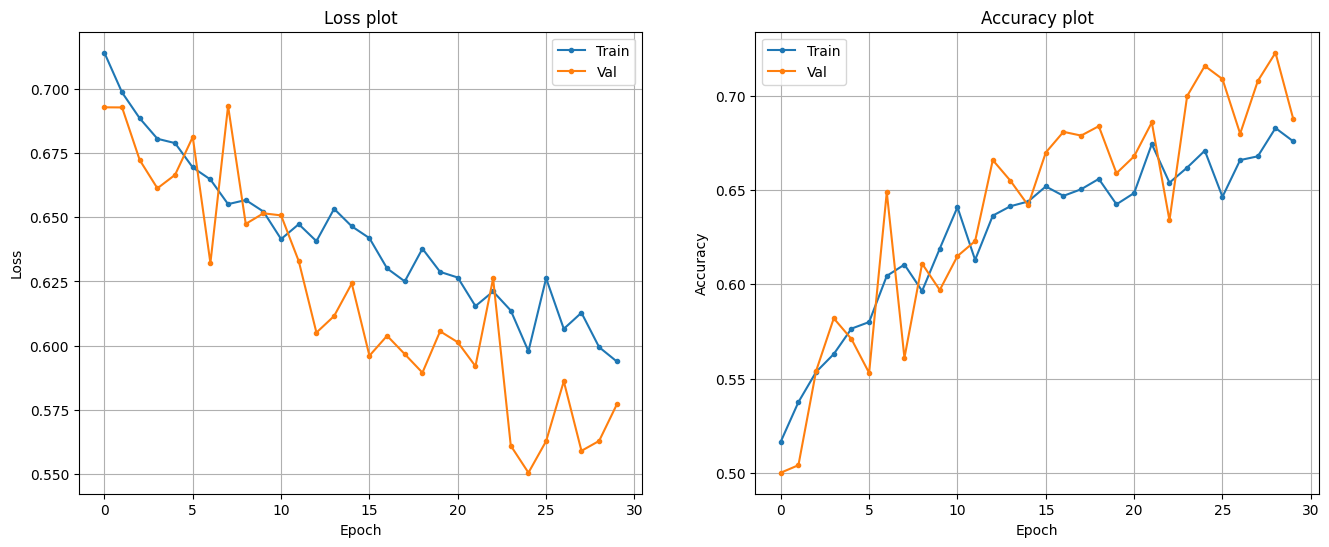

In [ ]:
plt.figure(figsize = (16,6))
ax1 = plt.subplot(1,2,1)
ax1.plot(history_dict['loss'],".-")
ax1.plot(history_dict['val_loss'],".-")
ax1.set_title("Loss plot")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend(["Train", "Val"])
ax1.grid()

ax2 = plt.subplot(1,2,2)
ax2.plot(history_dict['accuracy'],".-")
ax2.plot(history_dict['val_accuracy'],".-")
ax2.set_title("Accuracy plot")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend(["Train", "Val"])
ax2.grid()